# Proyecto: Análisis Exploratorio de Datos - calidad de vinos

![alt text](images/edawine.png)

Esta notebook es parte de un Proyecto de la [Escuela de Data Science e Inteligencia Artificial de Platzi](https://platzi.com/datos).

Todos los detalles [aquí](https://platzi.com/blog/ejercicio-eda-wine).

## Instrucciones generales

a) Sigue el paso a paso de cada sección. Para ello tendrás que leer indicaciones para saber qué hacer en cada etapa del EDA.

b) Completa el código en las celdas correspondientes para realizar tu análisis exploratorio de datos (EDA). Por ejemplo, encontrarás código incompleto marcado con guiones bajos (____):


In [1]:
school = 'platzi'
print(school) # Incluir la variable declarada anteriormente.

platzi


c) Escribe el código que veas conveniente para desarrollar lo que se pida en el EDA. Encontrarás secciones sin ninguna guía de código para que con tu creatividad uses las herramientas que veas necesarias.

d) No te límites. Agrega bloques de código y de Markdown cuando lo necesites.

e) Al final de cada sección encontrarás clases específicas de cursos de Platzi. Recuerda que en esos cursos es donde puedes aprender cómo resolver el proyecto. Puedes consultar las clases de manera directa para resolver tus dudas al momento.

f) También recuerda que puedes tomar todos esos cursos antes o utilizarlos como fuente de consulta:

- [Curso Básico de Python](https://platzi.com/cursos/python/)
- [Curso de Entorno de Trabajo para Ciencia de Datos con Jupyter Notebooks y Anaconda](https://platzi.com/cursos/jupyter-notebook/)
- [Curso de Python Intermedio: Comprehensions, Lambdas y Manejo de Errores](https://platzi.com/cursos/python-intermedio/)
- [Curso de Principios de Visualización de Datos para Business Intelligence](https://platzi.com/cursos/visualizacion-datos/)
- [Curso Básico de Manipulación y Transformación de Datos con Pandas y NumPy](https://platzi.com/cursos/pandas-numpy/)
- [Curso Básico de Visualización de Datos con Matplotlib y Seaborn](https://platzi.com/cursos/matplotlib-seaborn/)
- [Curso de Funciones Matemáticas para Data Science e Inteligencia Artificial](https://platzi.com/cursos/funciones-matematicas/)
- [Curso de Matemáticas para Data Science: Estadística Descriptiva](https://platzi.com/cursos/estadistica-descriptiva/)
- [Curso de Análisis Exploratorio de Datos](https://platzi.com/cursos/analisis-exploratorio-datos/)


## Conoce los datos - Vinho Verde

1. Lee esta información para tener contexto de los datos que se usarán:

Utilizaremos dos datasets enfocados en la calidad de vinos. Ambos se relacionan a las variantes de vino blanco y vino rojo del vino portugués "Vinho Verde".

![alt text](images/Large186.jpg)

La fuente de estos datasets son del Machine Learning Repository de UCI. Puedes conocer más de ellos [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality).

Input variables (based on physicochemical tests):
1. fixed acidity / acidez fija
La mayoría de los ácidos involucrados con el vino o fijos o no volátiles (no se evaporan fácilmente).

2. volatile acidity / acidez volátil
La cantidad de ácido acético en el vino, que en niveles demasiado altos puede provocar un sabor desagradable a vinagre.

3. citric acid / ácido cítrico
Encontrado en pequeñas cantidades el ácido cítrico puede agregar 'frescura' y sabor a los vinos.

4. residual sugar / azúcar residual
La cantidad de azúcar que queda después de que se detiene la fermentación. Es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.

5. chlorides / cloruros
La cantidad de sal en el vino.

6. free sulfur dioxide / dióxido de azufre libre
La forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.

7. total sulfur dioxide / dióxido de azufre total
Cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es mayormente indetectable en el vino, pero en concentraciones de SO2 libres superiores a 50 ppm, el SO2 se vuelve evidente en la nariz y el sabor del vino.

8. density / densidad
La densidad del agua es cercana a la del agua dependiendo del porcentaje de alcohol y azúcar contenido.

9. pH / pH
Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3 y 4 en la escala de pH

10. sulphates / sulfatos
Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante

11. alcohol / alcohol
El porcentaje de contenido de alcohol del vino

Output variable (based on sensory data):

12. quality / calidad
Variable de salida o target (basada en datos sensoriales, puntuación entre 0 y 10). Indica qué tan bueno es el vino en este estándar de calidad.

## Importar librerías

### 1. Ejecuta la siguiente celda para importar librerías.

Estas son las librerías de Python esenciales para ejecutar tu EDA. Mientras desarrolles el proyecto puedes agregar las que veas conveninente. 

Puedes usar cualquiera que conozcas del lenguaje Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# agrega librerías que necesites
import urllib.request as Req
import plotly.express as px
import plotly.graph_objects as go
# import plotly.offline as pyo # Esta comentada esta libreria ya que Deepnote no soporta la misma 

# pyo.init_notebook_mode()

print(f'''
Se agregaron las librerias de visualizacion de plotly ya que al permitir interaccion con los datos
son mas de mi agrado y de los que visualizaran por primera vez este proyecto.
''')


Se agregaron las librerias de visualizacion de plotly ya que al permitir interaccion con los datos
son mas de mi agrado y de los que visualizaran por primera vez este proyecto.



### *Clases sugeridas*:

- [Google Colab: primeros pasos](https://platzi.com/clases/2434-jupyter-notebook/40386-google-colab-primeros-pasos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Google Colab: ciencia de datos](https://platzi.com/clases/2434-jupyter-notebook/40387-google-colab-ciencia-de-datos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Utiliza Deepnote](https://platzi.com/clases/2434-jupyter-notebook/40388-utilizar-deepnote/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Carga de datos

### 1. Carga los datasets directo de sus URL como se muestran en la siguiente celda.

Nota: alternativamente podríamos cargar los datos con los archivos csv, pero con las URL los podemos tener de forma más directa desde la fuente.

In [3]:
'''
En caso de correr este programa en un entorno web como GitHub, DeepNote, etc, puede optar por comentar las lineas
de este bloque que se marcaran con un '#' al final para que al correr este bloque tome directamente los 
archivos.csv de los archivos cargados a esta carpeta.
'''

url_wine_red = r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' #
url_wine_white = r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv' #

Req.urlretrieve(url_wine_red, r'winequality-red.csv') #
archivo_red = r'winequality-red.csv'

Req.urlretrieve(url_wine_white, r'winequality-white.csv') #
archivo_white = r'winequality-white.csv'

### 2. Utiliza Pandas para crear tus DataFrames utilizando las dos variables que creaste para cargar los datos. 

Toma en cuenta que el delimiter de los archivos csv es `;`

In [4]:
red = pd.read_csv(archivo_red, delimiter=';')
white = pd.read_csv(archivo_white, delimiter=';')

### 3. Carga las primeras 5 filas de ambos DataFrames.

In [5]:
# Esta variable la creamos para darle un efecto de gradiente a nuestros DataFrames
# cm = sns.color_palette('blend:white,green', as_cmap=True) 

# Pero en lo personal no me gusto, por lo cual opte por usar 'coolwarm' directamente.
## usar 'coolwarm' u otra escala de color presente en la documentacion: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [6]:
red.head().style.background_gradient(cmap = 'coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [7]:
white.head().style.background_gradient(cmap = 'coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


### *Clases sugeridas*:

- [Series y DataFrames en Pandas](https://platzi.com/clases/2912-pandas-numpy/47984-series-y-dataframes-en-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Leer archivos CSV y JSON con Pandas](https://platzi.com/clases/2912-pandas-numpy/47985-leer-archivos-csv-y-json-con-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Combina ambos DataFrames

### 1. Incluye una variable llamada `category` a cada DataFrame que indiqué si el vino es rojo (red) o blanco (white). 

Esto servirá para distinguir el tipo de vino de cada fila/registro al unir los DataFrames.

In [8]:
red['category']='red'
white['category']='white'
white.head().style.background_gradient(cmap = 'coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6,white
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6,white
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6,white
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6,white
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6,white


### 2. Utiliza Pandas para unir ambos registros de los dos DataFrames.

In [9]:
# total_wine = red.append(white, ignore_index=True) 

# la funcion .append esta en desuso y la nueva funcion para esto es pd.concat, por esto no se uso.

df = pd.concat([red, white]).reset_index(drop=True)

### 3. Comprueba que el DataFrame este completo viendo sus primeras filas. Ve que la columna category esté con los datos correctos.

In [10]:
df.head().style.background_gradient(cmap = 'coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,red
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,red
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,red
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,red
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,red


### *Clases sugeridas*:

- [Agregar o eliminar datos con Pandas](https://platzi.com/clases/2912-pandas-numpy/47987-agregar-o-eliminar-datos-con-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Exploración inicial de los datos y validación

### 1. Consigue la cantidad de filas y columnas del DataFrame.

In [11]:
df.shape

(6497, 13)

### 2. Conoce los tipos de datos de cada característica/variable y si tienen valores nulos.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  category              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### 3. Cálcula las estadísticas descriptivas del dataset. 

Observa a detalle las estadísticas e identifica si existen diferencias altas entre cada percentil y en los percentilees extremos con valores máximos y mínimos de cada característica/variable.

In [13]:
df.describe().style.background_gradient(cmap = 'coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 4. Crea una variable donde almacenarás los valores de la columna `quality`. 

Revisa sus estadísticas descriptivas principales.

In [14]:
quality = df['quality']
quality

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

### 5. Cuenta los valores únicos de la variable `quality`. 

Para visualizar cómo se comporta e identificar si es una variable discreta o continua.

In [15]:
quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### 6. Escribe tus observaciones de cada uno de los pasos anteriores de esta sección:

Observe que en nuestro DataFrame la columna quality es la unica con variables numericas, pero si analizamos a profundidad tenemos que esta columna tiene variables cualitativas, ya que mas alla de que se representen con numeros, a lo que equivalen es al grado de satisfacion que causa al beberse el vino, todas las demas columnas que traian por defecto los documentos .csv usados, contienen variables continuas.

Con la funcion de valuar las variables de quality, podemos apreciar que la mayoria de los vinos estan en un rango intermedio tendiendo a alto de calidad, por lo cual el consumo de vino puede deducirse que se realiza mayoritariamente por personas de clase media-alta en su mayoria. Tambien podemos ver que partiendo de la suposicion que la escala va del 1 al 10, no se producen vinos a nivel empresarial y de consumo masivo con una calidad menor a grado 3 de calidad, vinos con un rango de calidad inferior a este, de existir muy posiblemente sean de fabricacion casera, de fabricacion artesanal se duda mucho ya que un vino artesanal no podra competir en precio con una empresa consolidada, por lo cual el precio que pudiera ofrecer una empresa de vino artesanal para un vino de calidad 2 (por ejemplo), muy posiblemente sea el precio al cual ofreceria una empresa consolidada un vino calidad 4. Por lo cual no tendria mucha salida de mercado.

De alli que veamos que en los estractos de menor poder adquisitivo el consumo de vino es casi nulo, y se opta principalmente es por el consumo de bebidas mas economicas o que su relacion calidad-precio-alcohol sea mayor.

Hay que resaltar que se tomo la suposicion de que la escala es del 1 al 10, ya que por medio de una investigacion sobre como se puntua el vino segun su calidad se obtuvo la ienformacion de que la escala numericamente mas cercana es la de Jancis Robinson que va en base a 20, pero en esta escala ya con 12 puntos es un vino "Defectuoso o desequilibrado", si esta fuera la escala, pudiera decirse que el analisis es para vinos que no son de consumo, sino de productos de tipo alpha, que no son sacados al publico. Porque? porque la escala de calidad de 6496 vinos son puntuados con 9 hasta el 3.

En otro caso si se toma que la base es 10, por su relacion con el 100 que es la base de las escalas "Guía Peñín" y "Robert Parker", se asume que la calidad del vino esta bien y se usa esta escala para tener datos discretos con los cuales trabajar y no continuos, como sucederia si se convierte 85% a su equivalente numerico 0.85 que es una variable continua. Por lo cual el analisis que dimos al comienzo es correcto y la puntuacion va de 1 en uno, donde si se equivaliera a porcentaje un vino de calidad 9 seria un vino con 90% de calidad aproximadamente. 

## Diferencia entre variable cualitativa y cuantitativa
La principal diferencia entre variable cualitativa y cuantitativa es que la primera representa una característica del sujeto u objeto en cuestión que puede explicarse con palabras. En tanto, la variable cuantitativa se expresa básicamente con cifras.

En ese sentido, podemos recordar, como mencionamos anteriormente, que una variable cualitativa puede asociarse a un número con fines estadísticos. Podemos asignar, por ejemplo, al nivel escolar, universitario y posgrado los números 1, 2 y 3, respectivamente. Pero esto no implica que el nivel de educación alcanzado deje de ser una variable cualitativa.

Caso distinto es el de las variables cuantitativas, que sí son cifras. Un claro ejemplo de ello son la remuneración o la edad de una persona.

Cabe señalar, además, que las variables cuantitativas son exactas. Esto, a diferencia de las variables cualitativas que tienden a ser más relativas.

Por ejemplo, el peso de una mancuerna de gimnasio puede ser de 20 kg. Este es un valor exacto. Sin embargo, una variable cualitativa podría ser el estado de esa mancuerna, lo cual no siempre podrá ser determinado con precisión. Puede ser que para algunos se encuentre en relativamente buen estado y otros opinen que la herramienta requiere mantenimiento.

## Tipos de variables cualitativas
Los tipos de variables cualitativas son las siguientes:

* Dicotómicas o binarias: Solo admiten dos posibilidades. Por ejemplo, nacional o extranjero.
* Politómicas: Pueden tener más de dos valores. Estas pueden, a su vez, subclasificarse en:
    * Nominales: No pueden ordenarse en una jerarquía específica, por ejemplo, la profesión.
    * Ordinales: Son aquellas que sí pueden ordenarse, por ejemplo, el nivel que se tiene en un idioma: básico, intermedio, avanzado o nativo.

### *Clases sugeridas*:

- [Shape y Reshape](https://platzi.com/clases/2912-pandas-numpy/47979-shape-y-reshape/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Funciones principales de Pandas](https://platzi.com/clases/2912-pandas-numpy/47990-funciones-principales-de-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Medidas de tendencia central](https://platzi.com/clases/2353-estadistica-descriptiva/38396-medidas-de-tendencia-central/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Medidas de tendencia central en Python](https://platzi.com/clases/2353-estadistica-descriptiva/38398-medidas-de-tendencia-central-en-python/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Categorización de la variable target

En la sección anterior pudiste observar que la variable `quality` es categórica en naturaleza. Crear categorías de calidad nos ayudará a entender mejor cómo se comporta la calidad en los vinos.

En esta sección entenderás mejor la razón de esto y lo ejecutarás.

### 1. Crea una gráfica tipo countplot de la variable `quality` para ver la cantidad de cada valor de calidad.

In [16]:
# fig = px.bar(x=df.value_counts('quality').index, y=df.value_counts('quality'))

fig = px.bar(x=quality.value_counts().index, 
             y=quality.value_counts(), 
             color=quality.value_counts(),
             color_continuous_scale='Rainbow', 
             opacity=0.8)

fig.update_layout(title = 'Cantidad de cada valor de calidad agrupados',
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark',
                  height = 500,
                  width = 1000,
                  xaxis_title="Calidad del vino", 
                  yaxis_title="Cantidad")

fig.show()

Con la visualización anterior es mucho más sencillo de observar cómo se categorizan los valores de calidad en 3 grupos principales (baja, media y alta). 

### 2. Completa la siguiente función lambda con las condiciones necesarias para agregar una columna al DataFrame donde se indique la categoría de calidad: 'Poor', 'Medium', 'High'. 

Para ello deberás definir el criterio de rango de valores de cada categoría de acuerdo a lo que observaste en la gráfica anterior.

In [17]:
# Aqui luego de un par de busquedas logre encontrar que tenemos dos alternativas para hacer esto:

# df['quality_category'] = df['quality'].apply(lambda x: 'High' if x >= 7 else ('Medium' if x >= 5 else 'Poor'))

# df.tail()  

################################################################

df['quality_category'] = np.select([df.quality>=7, 
                                    df.quality<=4], 
                                    ['High', 'Poor'], 
                                    default="Medium")

df.tail().style.background_gradient(cmap = 'coolwarm', axis=None)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_category
6492,6.200000,0.210000,0.290000,1.600000,0.039000,24.000000,92.000000,0.991140,3.270000,0.500000,11.200000,6,white,Medium
6493,6.600000,0.320000,0.360000,8.000000,0.047000,57.000000,168.000000,0.994900,3.150000,0.460000,9.600000,5,white,Medium
6494,6.500000,0.240000,0.190000,1.200000,0.041000,30.000000,111.000000,0.992540,2.990000,0.460000,9.400000,6,white,Medium
6495,5.500000,0.290000,0.300000,1.100000,0.022000,20.000000,110.000000,0.988690,3.340000,0.380000,12.800000,7,white,High
6496,6.000000,0.210000,0.380000,0.800000,0.020000,22.000000,98.000000,0.989410,3.260000,0.320000,11.800000,6,white,Medium


2.1 Redefine el tipo de variable de la nueva columna como tipo 'category'.

In [18]:
df.quality_category = df['quality_category'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  category              6497 non-null   object  
 13  quality_category      6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

### 3. Crea una gráfica para visualizar el conteo de datos en cada una de las categorías de calidad del vino.

In [19]:
fig = px.bar(x=df.value_counts('quality_category').index, 
             y=df.value_counts('quality_category'),
             color_continuous_scale='Rainbow',
             color=df.value_counts('quality_category'), 
             opacity=0.8)

fig.update_layout(title = 'Cantidad de cada valor de calidad agrupados',
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark',
                  height = 500,
                  width = 1000, 
                  xaxis={'categoryorder':'category descending'},
                  xaxis_title="Calidad del vino", 
                  yaxis_title="Cantidad")

fig.show()

### 4. Escribe tus observaciones de cada uno de los pasos anteriores de esta sección:

Como ya he resaltado en mis conjeturas anteriores y validado con la ultima grafica, la mayoria de del vino producido es de calidad media en adelante, siendo que se produce en menor medida el vino de alta calidad ya que este es un vino que hay que añejar mas, por lo que muchas veces el tiempo de maduracion puede ser varias veces mayor, y su precio igualmente resulta restrictivo para muchos consumidores. Igualmente apreciamos que la peor calidad de vino, es muy poco producido ya que no es el target o prospecto de cliente que las empresas de vino buscan, ya que el cliente con menor poder adquisitivo van a tirar de otras opciones mas costo eficientes  a la hora de ingerir alcohol.

### *Clases sugeridas*:

Gráficas

- [Set (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47947-set/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Categóricos (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Apply, lambdas, conversión de datos

- [Funciones anónimas: lambdas](https://platzi.com/clases/2255-python-intermedio/36465-funciones-anonimas-lambda/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Apply (Pandas)](https://platzi.com/clases/2912-pandas-numpy/47996-apply/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Tipos de datos (NumPy y Pandas)](https://platzi.com/clases/2912-pandas-numpy/47976-tipos-de-datos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Manejo de outliers

En una sección anterior tuviste una pista de qué existen outliers en el dataset. 

### 1. Utiliza el método que veas más conveniente para detectar outliers en tu dataset. Por ejemplo, boxplots, método IQR, etc.

In [20]:
df.describe().style.background_gradient(cmap = 'coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [36]:
fig = px.violin(df, 
                x='quality_category', 
                y='volatile acidity', 
                color = 'quality_category', 
                box=True, 
                points="all", 
                hover_data=df.columns, 
                color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'])

fig.update_layout(title = 'Grafica para determinar outliers',
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark',
                  height = 500,
                  width = 900,
                  legend_bgcolor='rgb(117, 112, 179)')

fig.show()

### 2. Responde la siguiente pregunta:

#### a) ¿Ves necesario eliminar estos outliers?


#### b) ¿Por qué?

#### Respuestas

Depende, si hemos corroborado que estos valores atípicos no se deben a un error a la hora de construir la base de datos o en la medición de la variable, eliminarlos no es la solución. Si no se debe a un error, eliminarlo o sustituirlo puede modificar las inferencias que se realicen a partir de esa información, debido a que introduce un sesgo, que disminuye el tamaño muestral y que puede afectar tanto a la distribución como a las varianzas. Por lo tanto, sin pruebas contundentes de que sea un error de construccion de la base de datos, no debemos borrar nueestros outliers.

Además, ¡en la variabilidad de los datos reside el tesoro de nuestra investigación!

Es decir, la variabilidad (diferencias en el comportamiento de un fenómeno) debe explicarse no eliminarse. Y si aún no puedes explicarla al menos debes poder disminuir la influencia de estos valores atípicos en tus datos.

La mejor opción es quitarle peso a esas observaciones atípicas mediante técnicas robustas.

Los métodos estadísticos robustos son técnicas modernas que hacen frente a estos problemas. Son similares a los clásicos pero se ven menos afectados por la presencia de valores atípicos o variaciones pequeñas respecto a las hipótesis de los modelos.

Puede considerarse la discretización como medio de lidiar con nuestros outliers.

fuente: https://www.maximaformacion.es/blog-dat/como-lidiar-con-los-datos-atipicos-outliers/

In [22]:
### 3. Elimina los outliers de ser necesario en la siguiente celda.

In [23]:
print('''No es necesario eliminar los outliers, es mejor aplicar otras tecnicas para que no afecten 
nuestras conclusiones, en caso de requerirse.''')

No es necesario eliminar los outliers, es mejor aplicar otras tecnicas para que no afecten 
nuestras conclusiones, en caso de requerirse.


### *Clases sugeridas*:

Estadística descriptiva
- [Medidas de dispersión](https://platzi.com/clases/2353-estadistica-descriptiva/38399-medidas-de-dispersion/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Desviación estándar](https://platzi.com/clases/2353-estadistica-descriptiva/38400-desviacion-estandar/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Medidas de dispersión en Python](https://platzi.com/clases/2353-estadistica-descriptiva/38401-medidas-de-dispersion-en-python/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Gráficas boxplots
- [Crear otro tipo de gráficas (Boxplot en Matplotlib)](https://platzi.com/clases/2913-matplotlib-seaborn/47945-crear-otro-tipo-de-graficas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Categóricos (Boxplot en Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Análisis de correlación entre variables

Ya que conociste el comportamiento esencial de las características y la variable `quality` es momento de conocer cómo se relacionan entre sí para descubrir si alguna(s) pueden afectar a esta calidad.

### 1. Crea una matriz de correlación de las variables numéricas del dataset.

In [24]:
df.corr(method ='pearson').style.background_gradient(cmap = 'coolwarm', axis=None) 

# Por defecto usa el metodo de 'pearson' si se deja en blanco dentro

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [25]:
df.corr(method ='kendall').style.background_gradient(cmap = 'coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.134082,0.190290,-0.018808,0.249126,-0.177936,-0.153720,0.303833,-0.172497,0.152473,-0.074303,-0.075990
volatile acidity,0.134082,1.000000,-0.201494,-0.053017,0.281802,-0.248022,-0.223240,0.174296,0.135709,0.173354,-0.013494,-0.199101
citric acid,0.190290,-0.201494,1.000000,0.052812,-0.050553,0.087468,0.112589,0.041026,-0.198630,0.023656,0.013566,0.082160
residual sugar,-0.018808,-0.053017,0.052812,1.000000,-0.017854,0.263818,0.305388,0.382221,-0.159924,-0.092279,-0.226004,-0.013097
chlorides,0.249126,0.281802,-0.050553,-0.017854,1.000000,-0.170156,-0.151690,0.414107,0.110776,0.259475,-0.275747,-0.228872
free sulfur dioxide,-0.177936,-0.248022,0.087468,0.263818,-0.170156,1.000000,0.559478,0.001132,-0.111764,-0.150723,-0.123386,0.066713
total sulfur dioxide,-0.153720,-0.223240,0.112589,0.305388,-0.151690,0.559478,1.000000,0.050936,-0.163244,-0.164785,-0.206316,-0.042283
density,0.303833,0.174296,0.041026,0.382221,0.414107,0.001132,0.050936,1.000000,0.008425,0.188499,-0.521495,-0.247978
pH,-0.172497,0.135709,-0.198630,-0.159924,0.110776,-0.111764,-0.163244,0.008425,1.000000,0.174444,0.096921,0.025223
sulphates,0.152473,0.173354,0.023656,-0.092279,0.259475,-0.150723,-0.164785,0.188499,0.174444,1.000000,0.008588,0.023679


In [26]:
df.corr(method ='spearman').style.background_gradient(cmap = 'coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.200272,0.270568,-0.032254,0.355964,-0.259914,-0.233259,0.434056,-0.250044,0.220145,-0.110650,-0.098154
volatile acidity,0.200272,1.000000,-0.295129,-0.064384,0.415896,-0.365673,-0.343534,0.261437,0.194876,0.255042,-0.023924,-0.257806
citric acid,0.270568,-0.295129,1.000000,0.074920,-0.074084,0.122058,0.159355,0.065690,-0.285905,0.036898,0.019653,0.105711
residual sugar,-0.032254,-0.064384,0.074920,1.000000,-0.035800,0.387750,0.454886,0.526664,-0.229344,-0.138157,-0.329218,-0.016891
chlorides,0.355964,0.415896,-0.074084,-0.035800,1.000000,-0.260421,-0.268434,0.590729,0.163528,0.370450,-0.401270,-0.295054
free sulfur dioxide,-0.259914,-0.365673,0.122058,0.387750,-0.260421,1.000000,0.741438,0.005841,-0.164699,-0.221062,-0.186046,0.086865
total sulfur dioxide,-0.233259,-0.343534,0.159355,0.454886,-0.268434,0.741438,1.000000,0.061540,-0.242719,-0.256745,-0.308982,-0.054777
density,0.434056,0.261437,0.065690,0.526664,0.590729,0.005841,0.061540,1.000000,0.011777,0.274792,-0.699442,-0.322806
pH,-0.250044,0.194876,-0.285905,-0.229344,0.163528,-0.164699,-0.242719,0.011777,1.000000,0.254263,0.140225,0.032538
sulphates,0.220145,0.255042,0.036898,-0.138157,0.370450,-0.221062,-0.256745,0.274792,0.254263,1.000000,0.004583,0.029831


### 2. Crea una gráfica tipo heatmap para observar mejor las correlaciones entre variables. 

In [27]:
fig1 = px.imshow(df.corr(), 
                 color_continuous_scale='Portland')

fig1.update_layout(title = 'Heatmaps de correlacion de nuestro dataset por metodo Pearson',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 750,
                 width = 900)

fig1.show()

### 3. Muestra una tabla con los valores de correlación de cada variable con la variable `quality`.

In [28]:
df.corr()[['quality']].sort_values(by='quality',ascending=False).style.background_gradient(cmap = 'coolwarm',axis=None)

,quality
quality,1.000000
alcohol,0.444319
citric acid,0.085532
free sulfur dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual sugar,-0.036980
total sulfur dioxide,-0.041385
fixed acidity,-0.076743
chlorides,-0.200666


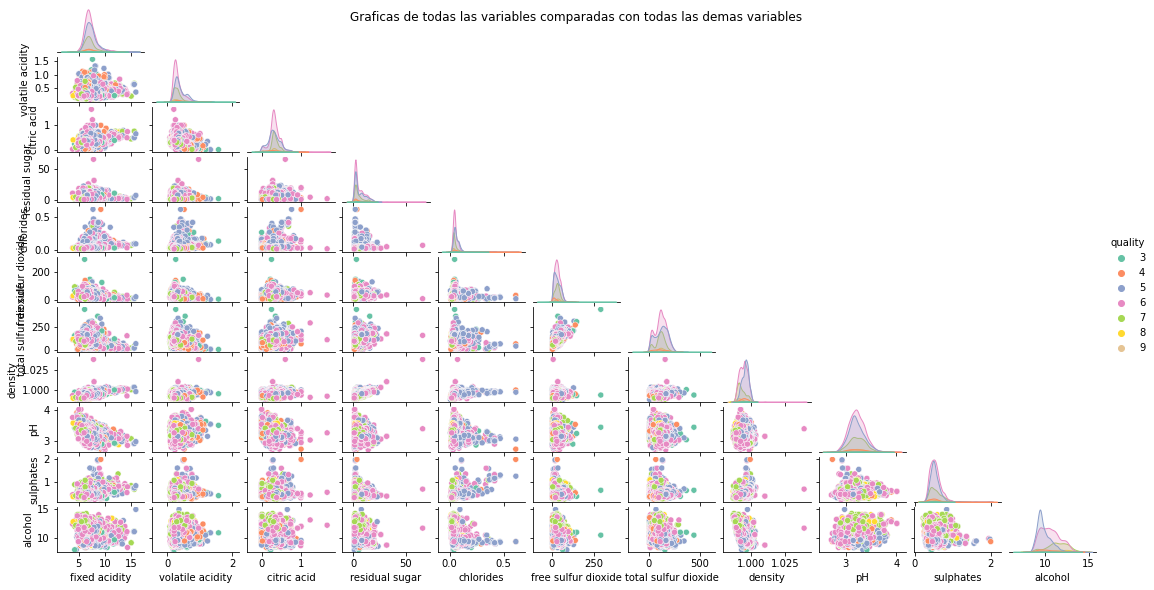

In [31]:
g = sns.pairplot(df,
                 height=1.5,
                 corner=True,
                 hue='quality',
                 kind='scatter',
                 palette='Set2')

g.fig.set_size_inches(16,8)

# g.set(xlim=(0, 18))

g.fig.suptitle('Graficas de todas las variables comparadas con todas las demas variables')

plt.show()

### 4. Responde las siguientes preguntas:

#### a) ¿Existen variables que tengan correlación positiva con la variable `quality`? ¿Cuáles son?

El alcohol es la unica variable que tiene una correlacion moderadamente positiva con la calidad del vino.

#### b) ¿Existen variables que tengan correlación negativa con la variable `quality`? ¿Cuáles son?

chlorides, volatile acidity y density

Las variables que más correlación tienen con la calidad son:

#### 1) Positivamente:
* Alcohol
* Citric acid

#### 2) Negativamente:

* Chlorides
* Volatile acidity
* Density

### 5. Crea las gráficas que consideres para ver la correlación que exista entre las variables que encontraste que tienen mayor correlación con la variable `quality`.

Esta pregunta esta un poco mal formulada por no decir que le faltan signos que separen la informacion de manera clara, ya que da pie a pensar que se debe crear graficas relacionadas entre quality y las variables con puntajes mas altos, pero lo que intento tratar de decir es que se creen graficas que muestren la correlacion entre las variables que sacaron anteriormente una puntuacion mas alta de manera individual con respecto a la calidad.

In [32]:
fig1 = px.scatter(df, 
                 x='citric acid', y='alcohol',
                 color = 'quality_category',
                 color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'], 
                 marginal_x='box', 
                 marginal_y='box', 
                 opacity=0.8)


fig1.update_layout(title='Grafica Acido citrico/Alcohol',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 500,
                 width = 900,
                 legend_bgcolor='rgb(117, 112, 179)')

fig1.show()

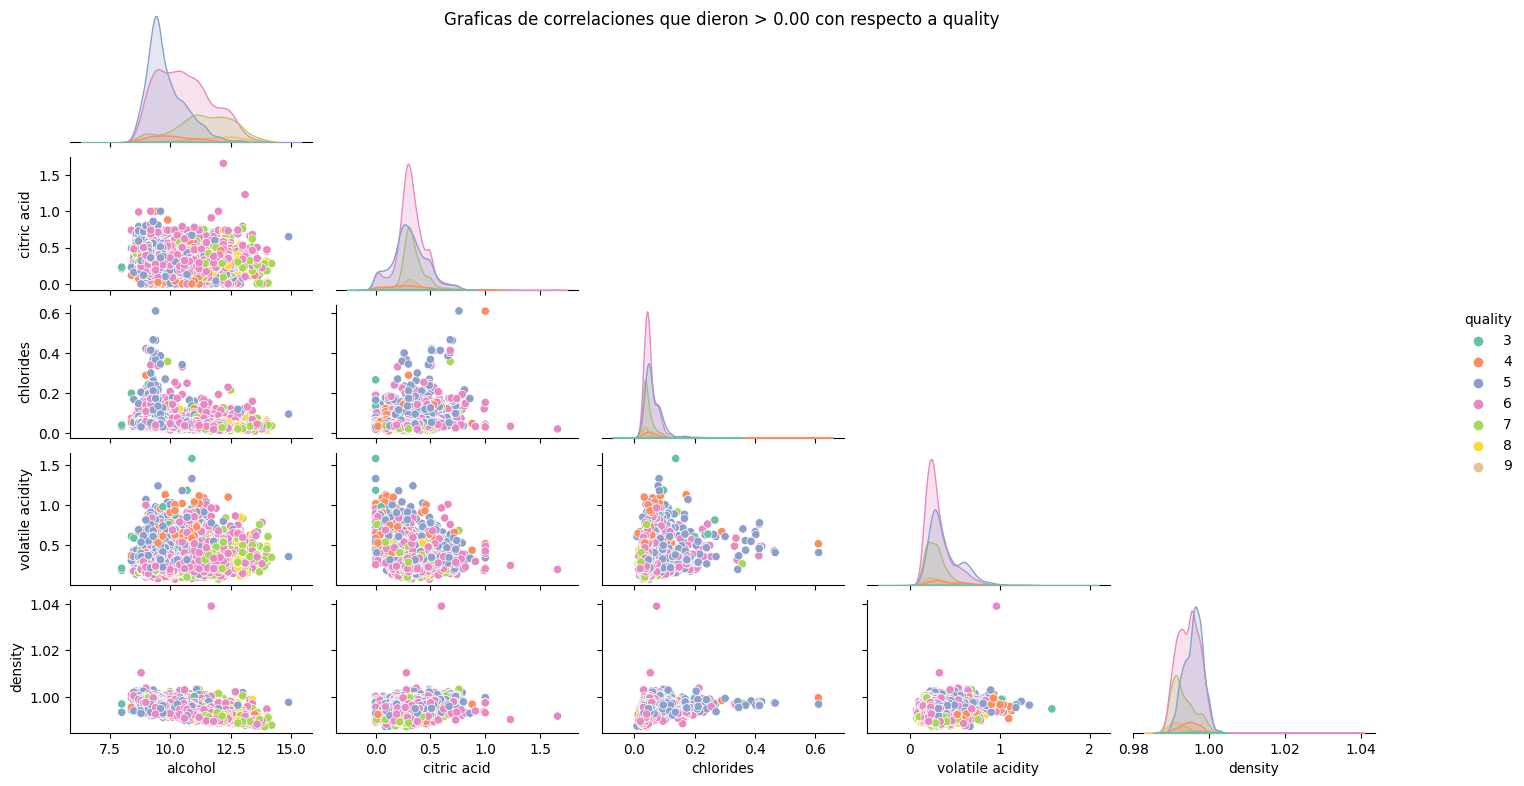

In [33]:
columns_corr_high = ['quality','alcohol','citric acid','chlorides','volatile acidity','density']

g = sns.pairplot(df[columns_corr_high],
                 height=1.5,
                 corner=True,
                 hue='quality',
                 kind='scatter',
                 palette='Set2')

g.fig.set_size_inches(16,8)

# g.set(xlim=(0, 18))

g.fig.suptitle('Graficas de correlaciones que dieron > 0.00 con respecto a quality')

plt.show()

### 6. Responde las preguntas: 

#### a) ¿Existen variables correlacionadas con la calidad que estén correlacionadas fuertemente entre sí?

Analizando las dos variables con correlacion mas alta con la variable de calidad, tenemos que entre ellas no estan relacionadas.

Esto debido que para dos variables, la fórmula compara la distancia de cada dato puntual respecto a la media de la variable y utiliza esta comparación para decirnos hasta qué punto la relación entre las variables se ajusta a una línea imaginaria trazada entre los datos. A esto nos referimos cuando decimos que la correlación examina las relaciones lineales.

Fuente: https://www.jmp.com/es_cl/statistics-knowledge-portal/what-is-correlation/correlation-coefficient.html


#### b) ¿Esta información para que nos serviría?
Para descartar correlaciones adicionales entre las demas variables de nuestro DataFrame.

![alt text](images/1548351202105.gif)

### 7. Crea gráficas de barras y de violín para ver a detalle cómo las variables que tienen correlación más fuerte con la variable `quality`, afectan a dicha variable.

- En el eje x deberán aparecer las categorías de calidad: Poor, Medium High.

- En el eje y deberá aparecer la variable correspondiente.

- Toma en cuenta los valores máximo y mínimo de cada variable para marcar los límites en el eje y.

Al finalizar obtendrás gráficas como estas:

![alt text](images/density.png)

![alt text](images/density_violin.png)

In [34]:
fig1 = px.violin(df, 
                x='quality_category', 
                y='alcohol', 
                color = 'quality_category', 
                box=True, 
                points="all", 
                hover_data=df.columns, 
                color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'])

fig1.update_layout(title = 'Grafica de violin para determionar efecto de la variable Alcohol en la calidad',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 500,
                 width = 900,
                 legend_bgcolor='rgb(117, 112, 179)')

fig1.show()


fig2 = px.violin(df, 
                x='quality_category', 
                y='citric acid', 
                color = 'quality_category', 
                box=True, 
                points="all", 
                hover_data=df.columns, 
                color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'])

fig2.update_layout(title = 'Grafica de violin para determionar efecto de la variable Acido citrico en la calidad',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 500,
                 width = 950,
                 legend_bgcolor='rgb(117, 112, 179)')

fig2.show()

In [35]:
fig1 = px.bar(df, 
              x='quality_category', 
              y='alcohol', 
              color='quality_category', 
              color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'], 
              barmode='overlay',
              opacity=0.8)

fig1.update_layout(title = 'Grafica de barras para determionar efecto de la variable Alcohol en la calidad',
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark',
                  height = 500,
                  width = 850, 
                  xaxis={'categoryorder':'category descending'},
                  legend_bgcolor='rgb(117, 112, 179)',
                  xaxis_title="Calidad", 
                  yaxis_title='Alcohol')

fig1.update_yaxes(ticksuffix = ' grados alcohol')
fig1.update_xaxes(ticksuffix = ' "Calidad del vino"')

fig1.show()

fig2 = px.bar(df, 
              x='quality_category', 
              y='citric acid', 
              color='quality_category', 
              color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'], 
              barmode='overlay',
              opacity=0.8)

fig2.update_layout(title = 'Grafica de barras para determionar efecto de la variable Acido citrico en la calidad',
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark',
                  height = 600,
                  width = 1000, 
                  xaxis={'categoryorder':'category descending'}, 
                  legend_bgcolor='rgb(117, 112, 179),
                  xaxis_title="Calidad", 
                  yaxis_title='Acido citrico')

fig2.show()

### 8. Responde las siguientes preguntas como conclusiones de este EDA:

#### a) ¿Cuáles son las variables que podrían afectarían a la calidad del vino?
El acido citrico puede afectar la calidad del vino, ya que tenemos que los vinos de buena calidad presentan la menor proporcion con datos no mayores a 0.75, los de peor calidad cuentan con una proporcion de acido citrico de hasta el 1, y los vinos de calidad intermedia pueden llegar a tener una proporcion de acido citrico de hasta el 1,66. Pero esto ya requeriria un analisis de puntacion de cada estracto economico al cual esta enfocada cada calidad de vino y ver como persiven la acidez o si varia dependiendo de un tipo de vino a otro. Tendria que evaluarse tambien con respecto al vino rojlo y blanco por separado.

#### b) ¿Es necesario aumentar o disminuir la cantidad de dichas variables para aumentar la calidad?
Tenemos que el 50% de los vinos de buena calidad estan en un rango 10.7 y 12.4 grados de alcohol, los vinos de las otras dos calidades tienen el 50% de sus vinos entre 11 y 9.4 grados de alcohol. Asi que al parecer si, aumentar un poco el alcohol parece aumentar la calidad del vino.

#### c) ¿Cuál es la variable que más podría afectar a la calidad del vino?
De estas dos variables, el acido citrico es mas probable que influya en la calidad del vino, ya que aparte de que los datos son mas marcados, un sabor citrico y no dulce en un vino puede no gustar al paladar del consumidor.

En resumen, faltan mas datos para validar las suposiciones realizadas.

### *Clases sugeridas*:

Estadística descriptiva y EDA
- [Correlaciones](https://platzi.com/clases/2353-estadistica-descriptiva/38409-correlaciones/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Matriz de covarianza](https://platzi.com/clases/2353-estadistica-descriptiva/38410-matriz-de-covarianza/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Correlación](https://platzi.com/clases/2178-analisis-exploratorio-datos/34151-correlacion/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Gráficas
- [Relation (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47951-relation/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Heatmap (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47953-heatmap/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Jointplot y Pairplot (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47952-jointplot-y-pairplot/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Bar Plot (Matplotlib)](https://platzi.com/clases/2913-matplotlib-seaborn/47944-bar-plot/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Categóricos (Violin plot en Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Siguientes pasos 🚀

---

¡Muchas felicidades! Has creado tu primer proyecto de análisis exploratorio de datos.

Es importante que recuerdes que dentro del análisis exploratorio de datos hay múltiples caminos y herramientas de acuerdo a lo que quieras lograr. Podríamos ir más allá en la manipulación y análisis de datos. Incluso podríamos utilizar machine learning para validar nuestra hipótesis.

En este momento ya tienes **el primer proyecto para tu portafolio profesional**. Para seguir avanzando en tu carrera te recomendamos el [Curso para Crear tus Proyectos de Ciencia de Datos](https://platzi.com/cursos/proyectos-data-science/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda) y el [Curso para Conseguir Trabajo en Tecnología](https://platzi.com/cursos/conseguir-trabajo-tech/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda) y tendrás todo para unirte a una startup como Data Analyst o Data Scientist. #StartupReady 🚀

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=538a5c52-b411-473f-a403-a1e641af9912' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>